In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<AxesSubplot:xlabel='tip', ylabel='sex'>

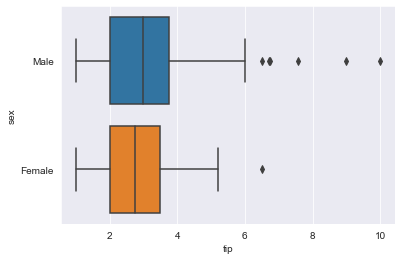

In [3]:
sns.boxplot(data=tips, x='tip', y='sex')

<AxesSubplot:xlabel='tip', ylabel='Density'>

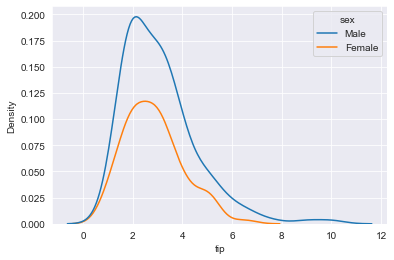

In [4]:
sns.kdeplot(data=tips, hue='sex', x='tip')

<AxesSubplot:xlabel='tip', ylabel='sex'>

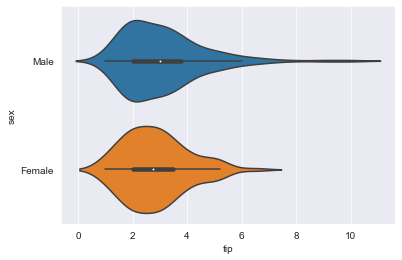

In [5]:
sns.violinplot(data=tips, x="tip", y="sex")

<AxesSubplot:xlabel='sex', ylabel='tip'>

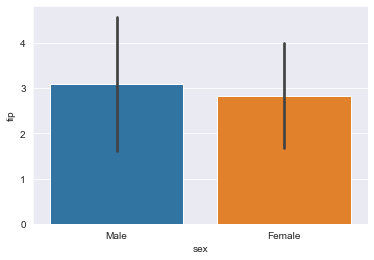

In [6]:
sns.barplot(data=tips, x='sex', y='tip', ci='sd')

## The t-test for two independent samples

In [7]:
control = np.array([91, 87, 99, 77, 88, 91])
treatment = np.array([101, 110, 103, 93, 99, 104])

- $H_0$: $\mu_1 - \mu_2 = 0$ (reaction time is the same in both groups)
- $H_1$: $\mu_1 - \mu_2 < 0$ (reaction time is significantly higher in the treatment group compared to the control group)

In [8]:
# less
stats.ttest_ind(a=control, b=treatment,
    alternative='less', equal_var=False)

Ttest_indResult(statistic=-3.445612673536487, pvalue=0.003391230079206901)

In [12]:
# 2-sided
s, p = stats.ttest_ind(alternative='two-sided',
    a=tips.tip[tips.sex == 'Male'],
    b=tips.tip[tips.sex == 'Female']);
print(f"statistic: {s}")
print(f"pvalue: {p}")

statistic: 1.3878597054212687
pvalue: 0.16645623503456763


## The t-test for paired samples
- $H_0$: $\mu_1 - \mu_2 = 0$ (performance is the same in both groups)
- $H_1$: $\mu_1 - \mu_2 < 0$ (performance is significantly higher in the additives group compared to the regular group)

In [13]:
# Measurements:
regular =   np.array([16, 20, 21, 22, 23, 22, 27, 25, 27, 28])
additives = np.array([19, 22, 24, 24, 25, 25, 26, 26, 28, 32])

# Paired t-test with ttest_rel()
stats.ttest_rel(regular, additives, alternative='less')

Ttest_relResult(statistic=-4.47213595499958, pvalue=0.00077494295585091)

pvalue is very small, we reject $H0$, on a significance level of 5% we conclude that there is a difference between regular and additive

## Effect size
*Cohen's $d$*

| Cohen's d | Effect Size  |
| :---:     | :---         |
| 0.01      | Very small   |
| 0.2       | Small        |
| 0.5       | Average      |
| 0.8       | Large        |
| 1.2       | Very large   |
| 2.0       | Huge         |

In [14]:
def cohen_d(a, b):
    na = len(a)
    nb = len(b)
    pooled_sd = np.sqrt( ((na-1) * a.std(ddof=1)**2 +
                          (nb-1) * b.std(ddof=1)**2) / (na + nb - 2) )
    return (b.mean() - a.mean()) / pooled_sd

In [15]:
# Effect size of additives in gasoline:
cohen_d(regular, additives)

0.5573262931770191